In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
style_1 = [
     {'selector':"th", 
     'props':[('background-color', 'darkblue'),
               ('color', 'white'),
               ('font-weight','bold'),
               ("border-collapse", "collapse"),
               ('text-transform', 'uppercase'),
               ('border', '0.5px solid white') 
               ]},
    {'selector': 'td',
     'props': [('background-color', 'blue'),
               ('color', 'white'),
               ('font-weight','light'),
               ('text-transform', 'uppercase'),
               ('border', '0.5px solid white')]},
    
    {'selector': 'caption',
     'props': [('color', 'black'),
               ('font-size', '30px')]}
]


style_2 = [
    {'selector':"th", 
     'props':[ ("color", "#fff"),
               ("padding", "12px 35px"),
               ("border-collapse", "collapse"),
               ("background", "#00cccc"),
               ("text-transform", "uppercase"),
               ("font-size", "12px")
               ]},
    
    {'selector': 'td',
     'props': [('text-transform', 'uppercase'),
               ('border', '0.5px solid white')]},
    
    {'selector': 'caption',
     'props': [('color', 'black'),
               ('font-size', '25px')]}
]

def display(df_table, caption="", style=style_2):
    return df_table.style.set_table_styles(style).set_caption(caption.upper()).hide_index()

In [3]:
#Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import holidays
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
FILEPATH='../input/playground-series-s3e19'
df_train=pd.read_csv(os.path.join(FILEPATH,'train.csv'))
df_train['date'] = pd.to_datetime(df_train['date'])
df_test=pd.read_csv(os.path.join(FILEPATH,'test.csv'))
df_test['date']=pd.to_datetime(df_test['date'])

cols=df_train.columns.tolist()
target_col='num_sold '
cat_cols=df_train.select_dtypes(include='object')
num_cols=df_train.select_dtypes(include='int64')

In [5]:
display(pd.DataFrame(df_train.isna().sum()+df_test.isna().sum()).transpose(),'sparsity')

country,date,id,num_sold,product,store
0.000000,0.000000,0.000000,nan,0.000000,0.000000


In [6]:
display(df_train.head(),'header')

id,date,country,store,product,num_sold
0,2017-01-01 00:00:00,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,2017-01-01 00:00:00,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2017-01-01 00:00:00,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,2017-01-01 00:00:00,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,2017-01-01 00:00:00,Argentina,Kaggle Learn,Using LLMs to Write Better,49


In [7]:
display(df_train.describe().iloc[:,1].to_frame().transpose(),'stats_sale',style_1)

count,mean,std,min,25%,50%,75%,max
136950.000000,165.522636,183.691575,2.000000,46.000000,98.000000,184.000000,1380.000000


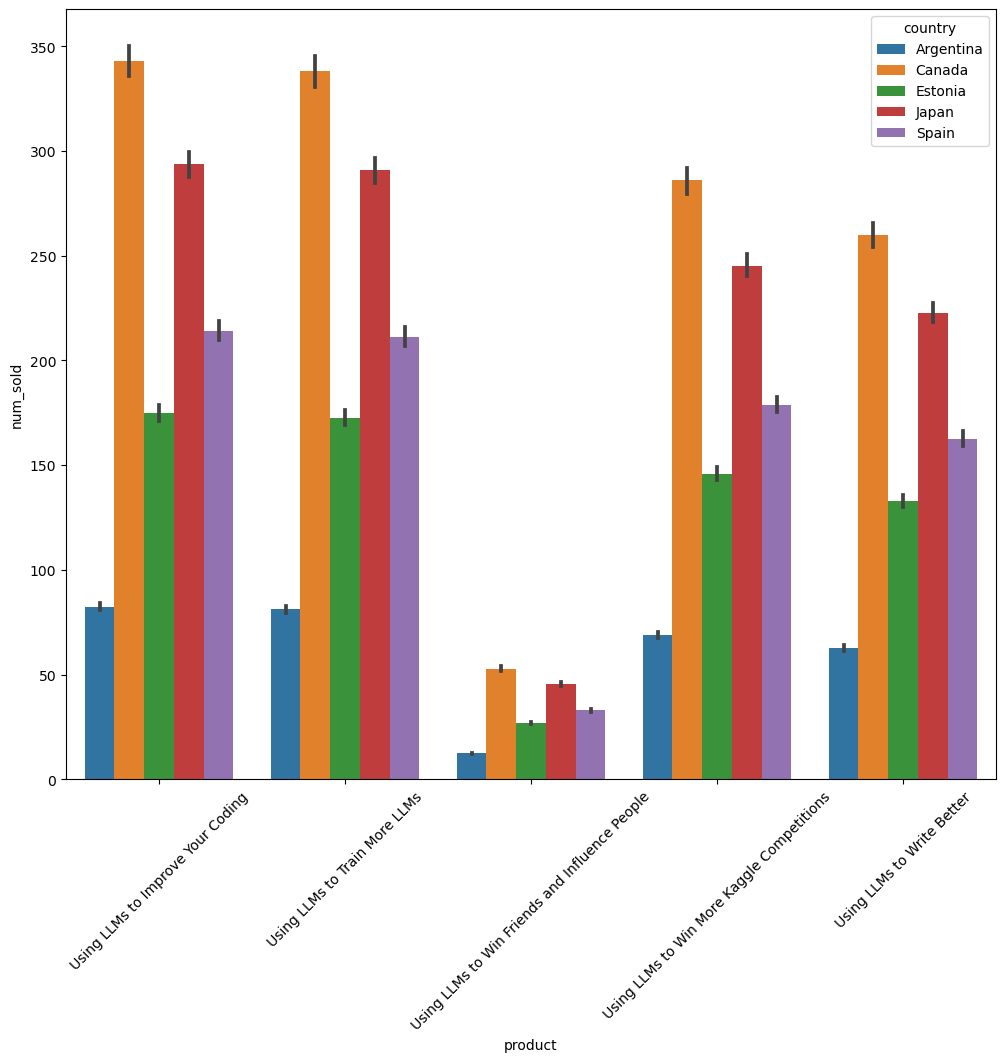

In [8]:
#A plot for visualising sales of each product in each country.
plt.figure(figsize = (12, 10))
ax = sns.barplot(data = df_train, x = 'product', y = 'num_sold', hue = 'country')
plt.xticks(rotation = 45);

#Argentina got least sales
#Canada got the most sales
#The most sold product is 'USING LLM TO IMPROVE CODING'

<Figure size 500x2000 with 0 Axes>

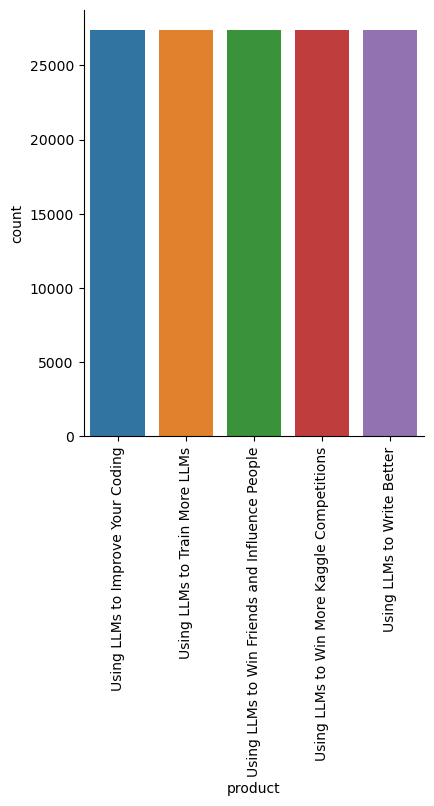

In [9]:
plt.figure(figsize=(5,20))
ax=sns.catplot(data=df_train,x='product',kind='count')
plt.xticks(rotation =90);
#The dataset is balanced for each product

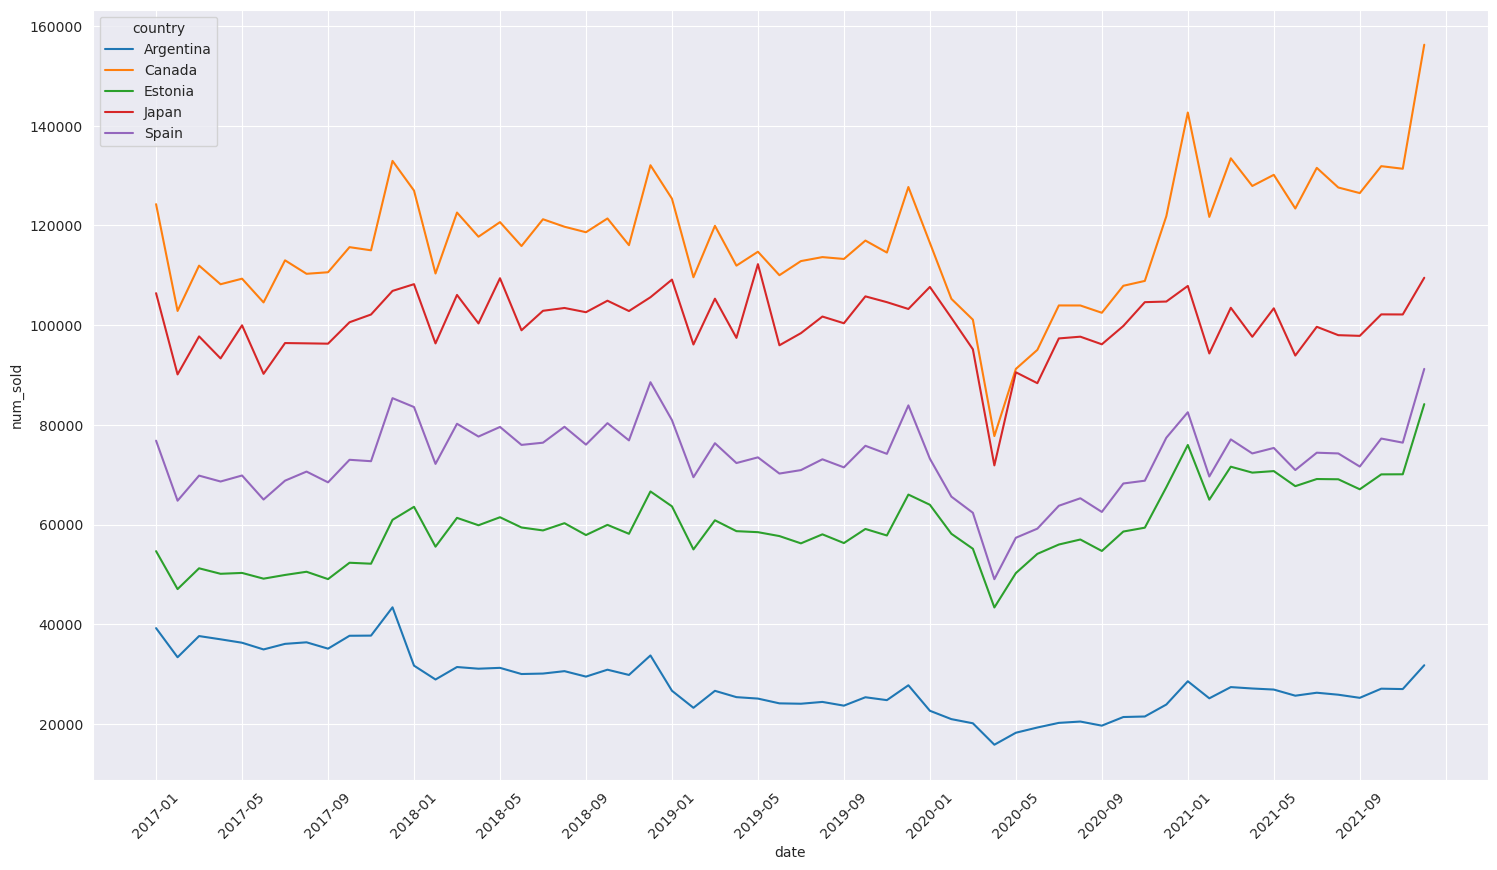

In [10]:
#Each tuple give sale of a  product in a store from a particular country
#We would love to visualise total sale in each country along the year
#Each group is total sales of a particular country in a particular month
plt.figure(figsize=(18,10))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_train.groupby([df_train.country,df_train.date.dt.strftime('%Y-%m')])['num_sold'].sum().
             reset_index(),x='date',y='num_sold',hue='country')
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation = 45);

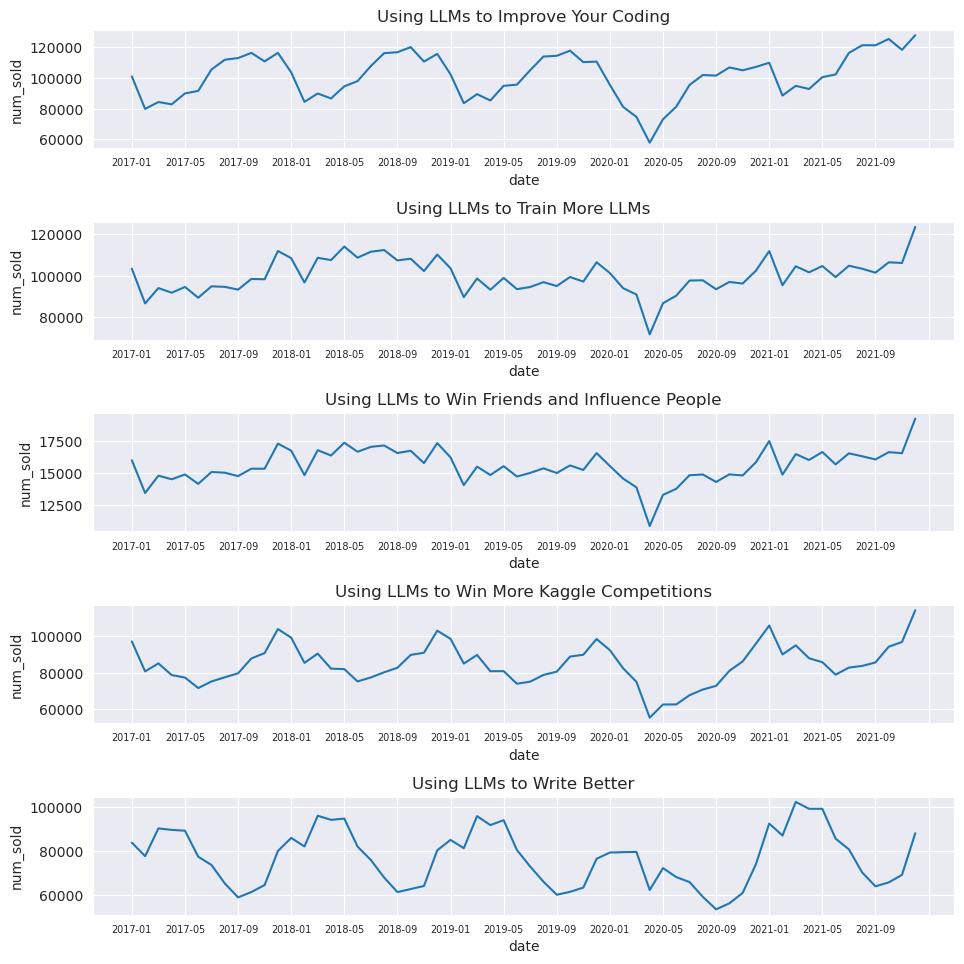

In [11]:
#Visualising sales of each products across the countries for each month
def product_forecast(df):
    gp=df.groupby(['product',df.date.dt.strftime('%Y-%m')])['num_sold'].sum()
    fig,axes=plt.subplots(nrows=df['product'].nunique(),ncols=1,figsize=(10,10))
    ax=axes.flatten()
    for i,x in enumerate(df['product'].unique().tolist()):
        df_product=gp[x,:].to_frame()
        ax[i].set_title(x)
        ax[i]=sns.lineplot(data=df_product,x='date',y='num_sold',ax=ax[i]) 
        ax[i].tick_params(axis='x', labelsize=7)
        ax[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
    plt.tight_layout(pad=2.0, h_pad=1.0, w_pad=1)
    plt.show()
product_forecast(df_train)
#Observing periodicity in the sales of each product.
#Since pandemic is over i we should remove that period.

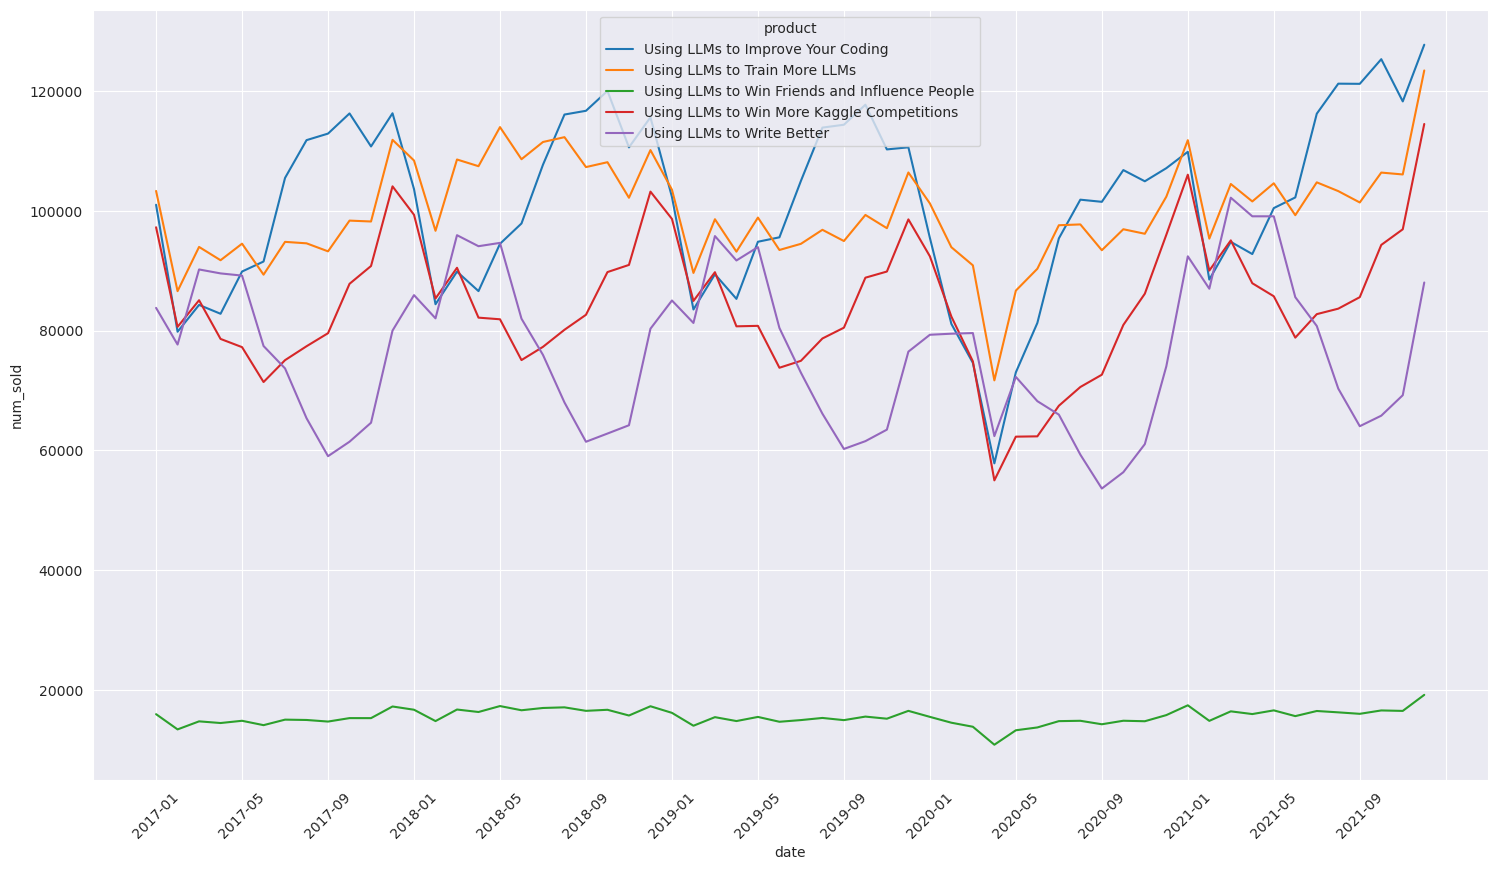

In [12]:
plt.figure(figsize=(18,10))
sns.set_style("darkgrid")
ax=sns.lineplot(data=df_train.groupby(['product',df_train.date.dt.strftime('%Y-%m')])['num_sold'].sum().
             reset_index(),x='date',y='num_sold',hue='product')
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation = 45);

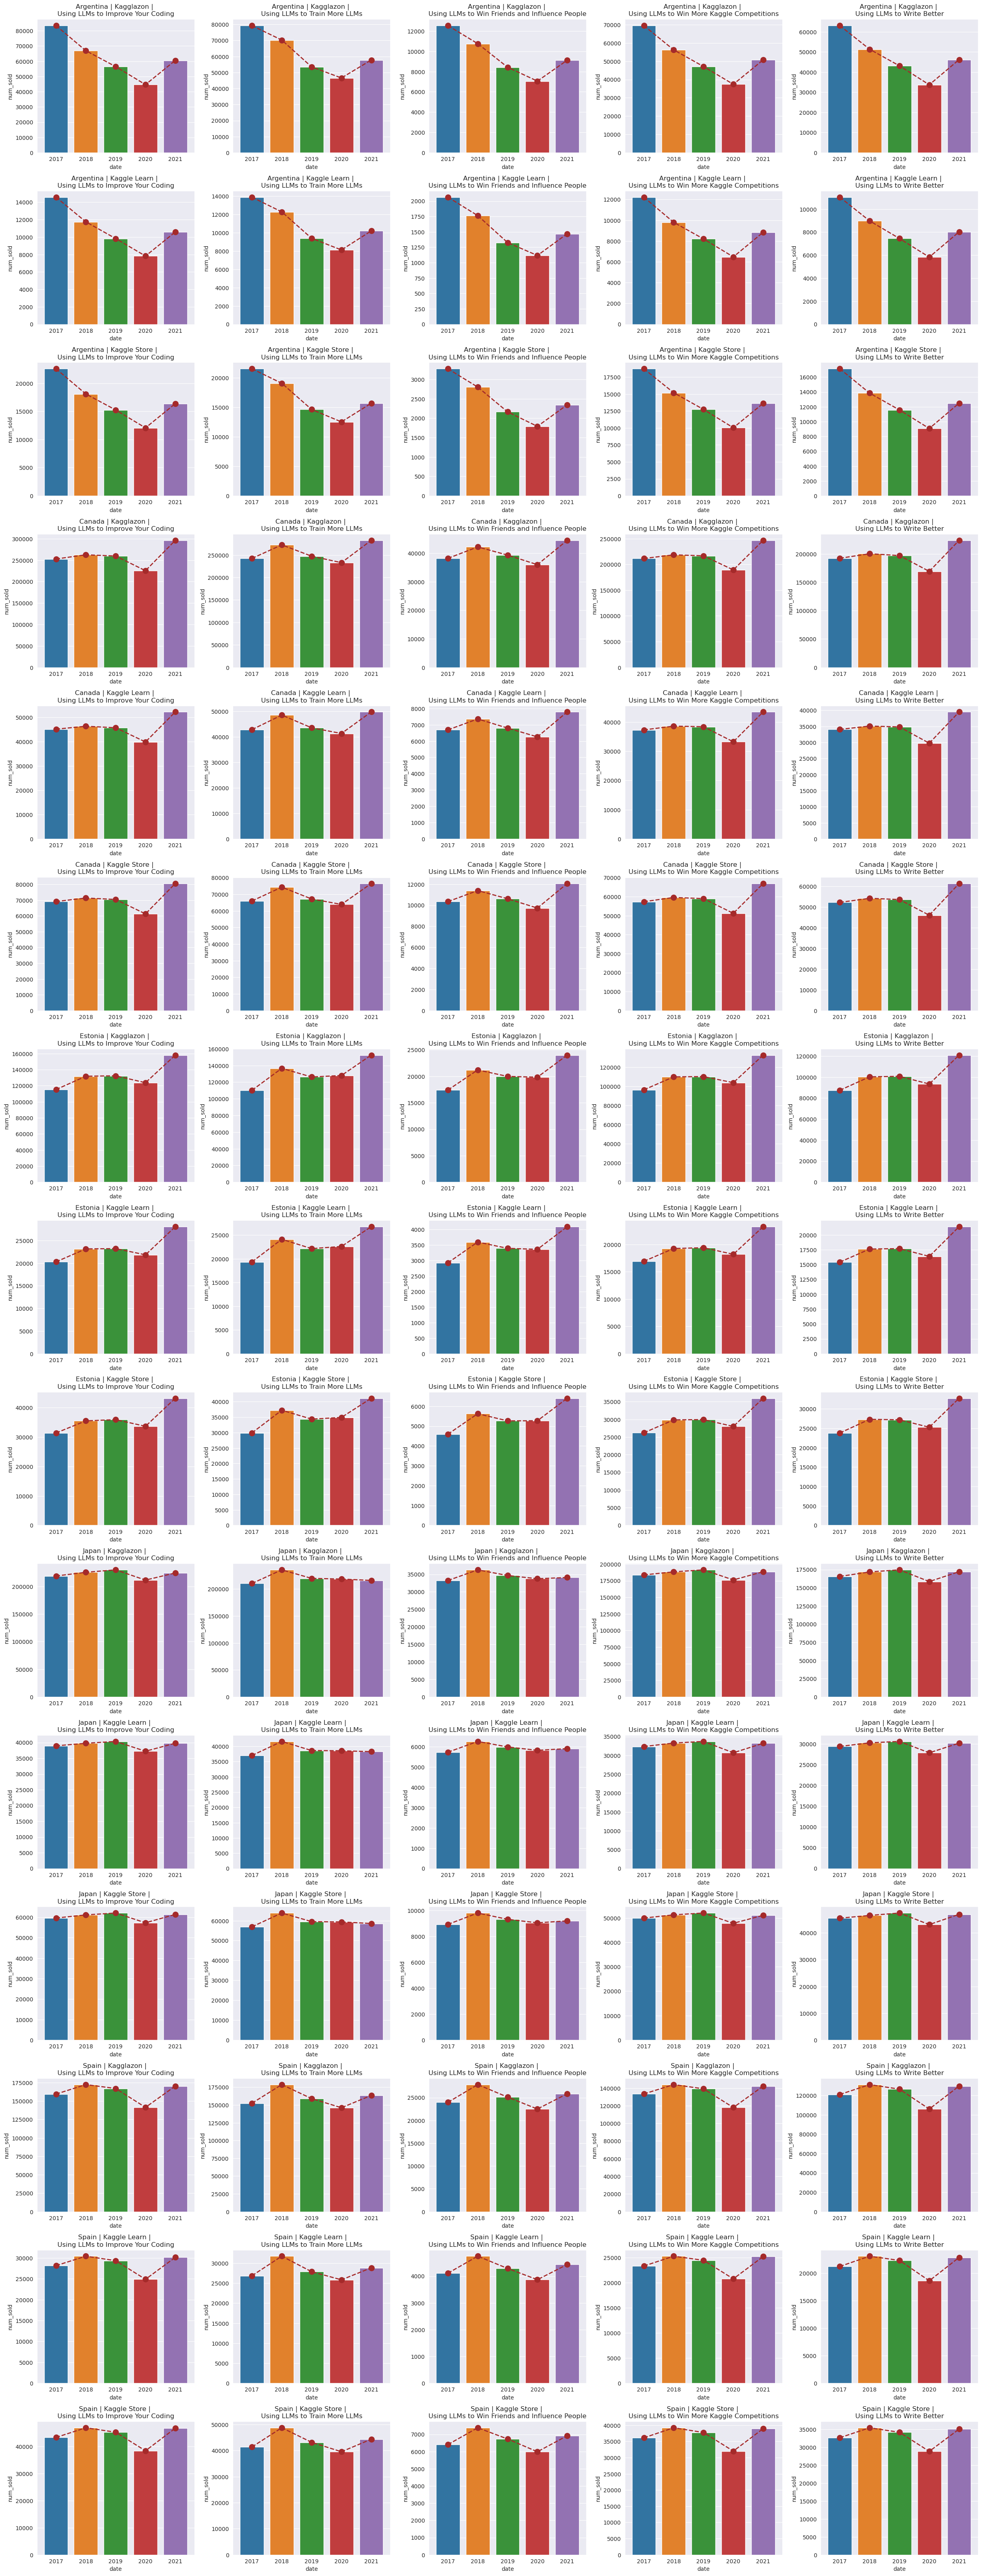

In [13]:
fig, ax = plt.subplots(15, 5, figsize = (25, 65))
ax = ax.flatten()
for i, (combination, df) in enumerate(df_train.groupby(['country', 'store', 'product'])):
    data = df.groupby(df.date.dt.year)['num_sold'].sum().reset_index()
    sns.barplot(data = data, x = 'date', y = 'num_sold', ax = ax[i])
    ax[i].plot(ax[i].get_xticks(), data.num_sold,
               color = 'brown', linestyle = '--', marker = '.',
               markersize = 20, linewidth = 2
    )
    ax[i].set_title(combination[0] + ' | ' + combination[1] +  ' | ' + '\n' + combination[2])
plt.tight_layout(pad=2.0, h_pad=1.0, w_pad=1)

# Trend analysis

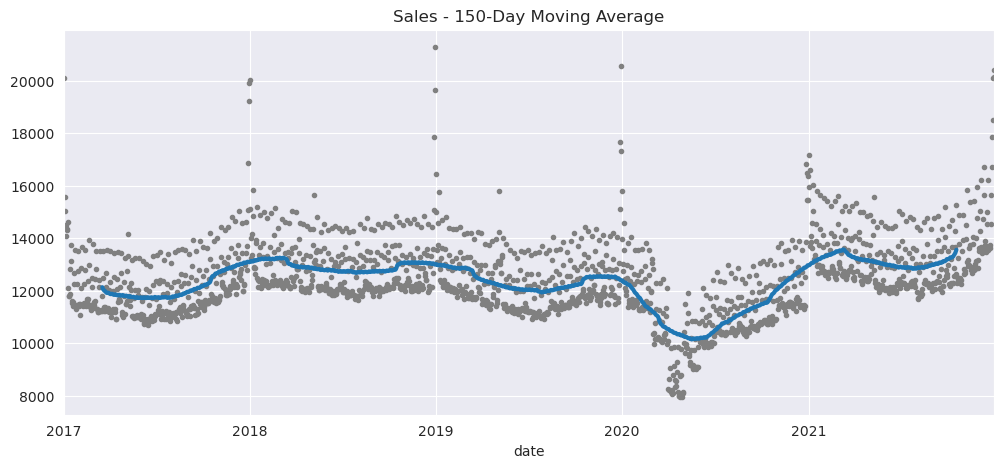

In [14]:
#Trend analysis
plt.figure(figsize=(12,5))
trend=df_train.groupby([df_train.date])['num_sold'].sum()
moving_average = trend.rolling(
    window=150,       
    center=True,     
).mean()             

ax = trend.plot(style=".", color="0.5")
moving_average.plot(ax=ax, linewidth=3, title="Sales - 150-Day Moving Average", legend=False,
);

In [15]:
#we tried to visualise the trend using moving average.I come to the conclusion that a 3rd order
#curve can fit the trend better hence wish to add a feature that would decide in creating a 3rd degree
#curve for model fitting during training.
from statsmodels.tsa.deterministic import DeterministicProcess
df_trend=df_train.groupby([df_train.date])['num_sold'].sum()
dp=DeterministicProcess(index=df_trend.index, order=3,drop=True)
X_trend=dp.in_sample()#These features are supposed to give the curve and they remove normal time dummies
X_forec=dp.out_of_sample(steps=90)

In [16]:
#Adding dates as index for test set.Deterministic process was supposed to give this.
last_date = df_trend.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=90)
X_fore=pd.DataFrame(data=X_forec,index=forecast_dates)
#There was some thing wrong with out_of_sample so that it didnt give dates as index hence had to do this manual
X_fore['trend'] = list(X_forec.iloc[:, 0])
X_fore['trend_squared'] = list(X_forec.iloc[:, 1])
X_fore['trend_cubed'] = list(X_forec.iloc[:, 2])

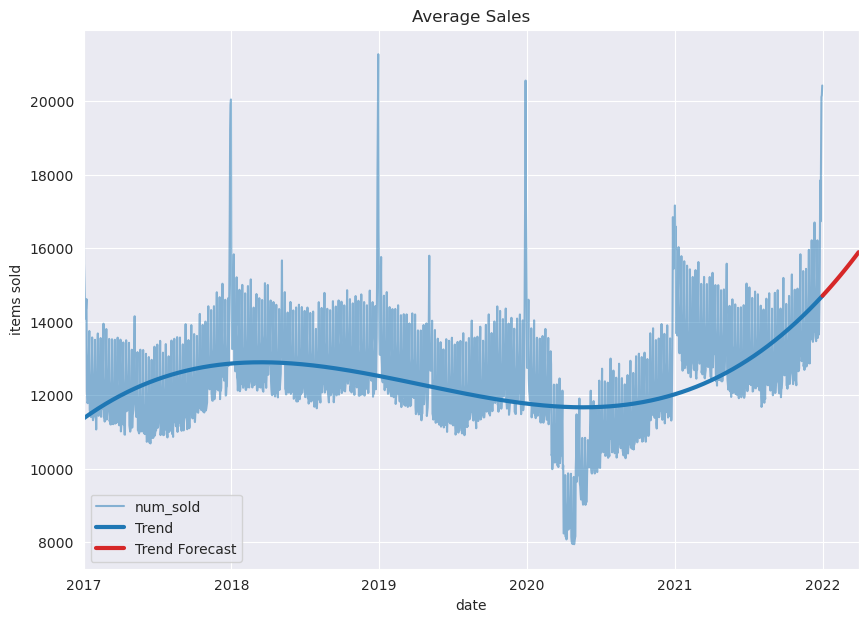

In [17]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(10,7))
model = LinearRegression()
#fitting the model using the created feature and actual sales
model.fit(X_trend,df_trend)

#Using the model to predict
#predicting training set()
y_pred = pd.Series(model.predict(X_trend), index=X_trend.index)
#predicting the testing set
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

#Checking whether the model can do the fitting and testing visually through plots
ax = df_trend.plot( alpha=0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();

# Seasonal trends

In [18]:
#Checking for seasonal trends
df_season=df_train.groupby([df_train.date])['num_sold'].sum().to_frame()
# days within a week
df_season["day"] = df_season.index.dayofweek  # the x-axis (freq)
df_season["week"] = df_season.index.week  # the seasonal period (period)

# days within a year
df_season["dayofyear"] = df_season.index.dayofyear
df_season["year"] = df_season.index.year

In [19]:
from pathlib import Path
from warnings import simplefilter
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

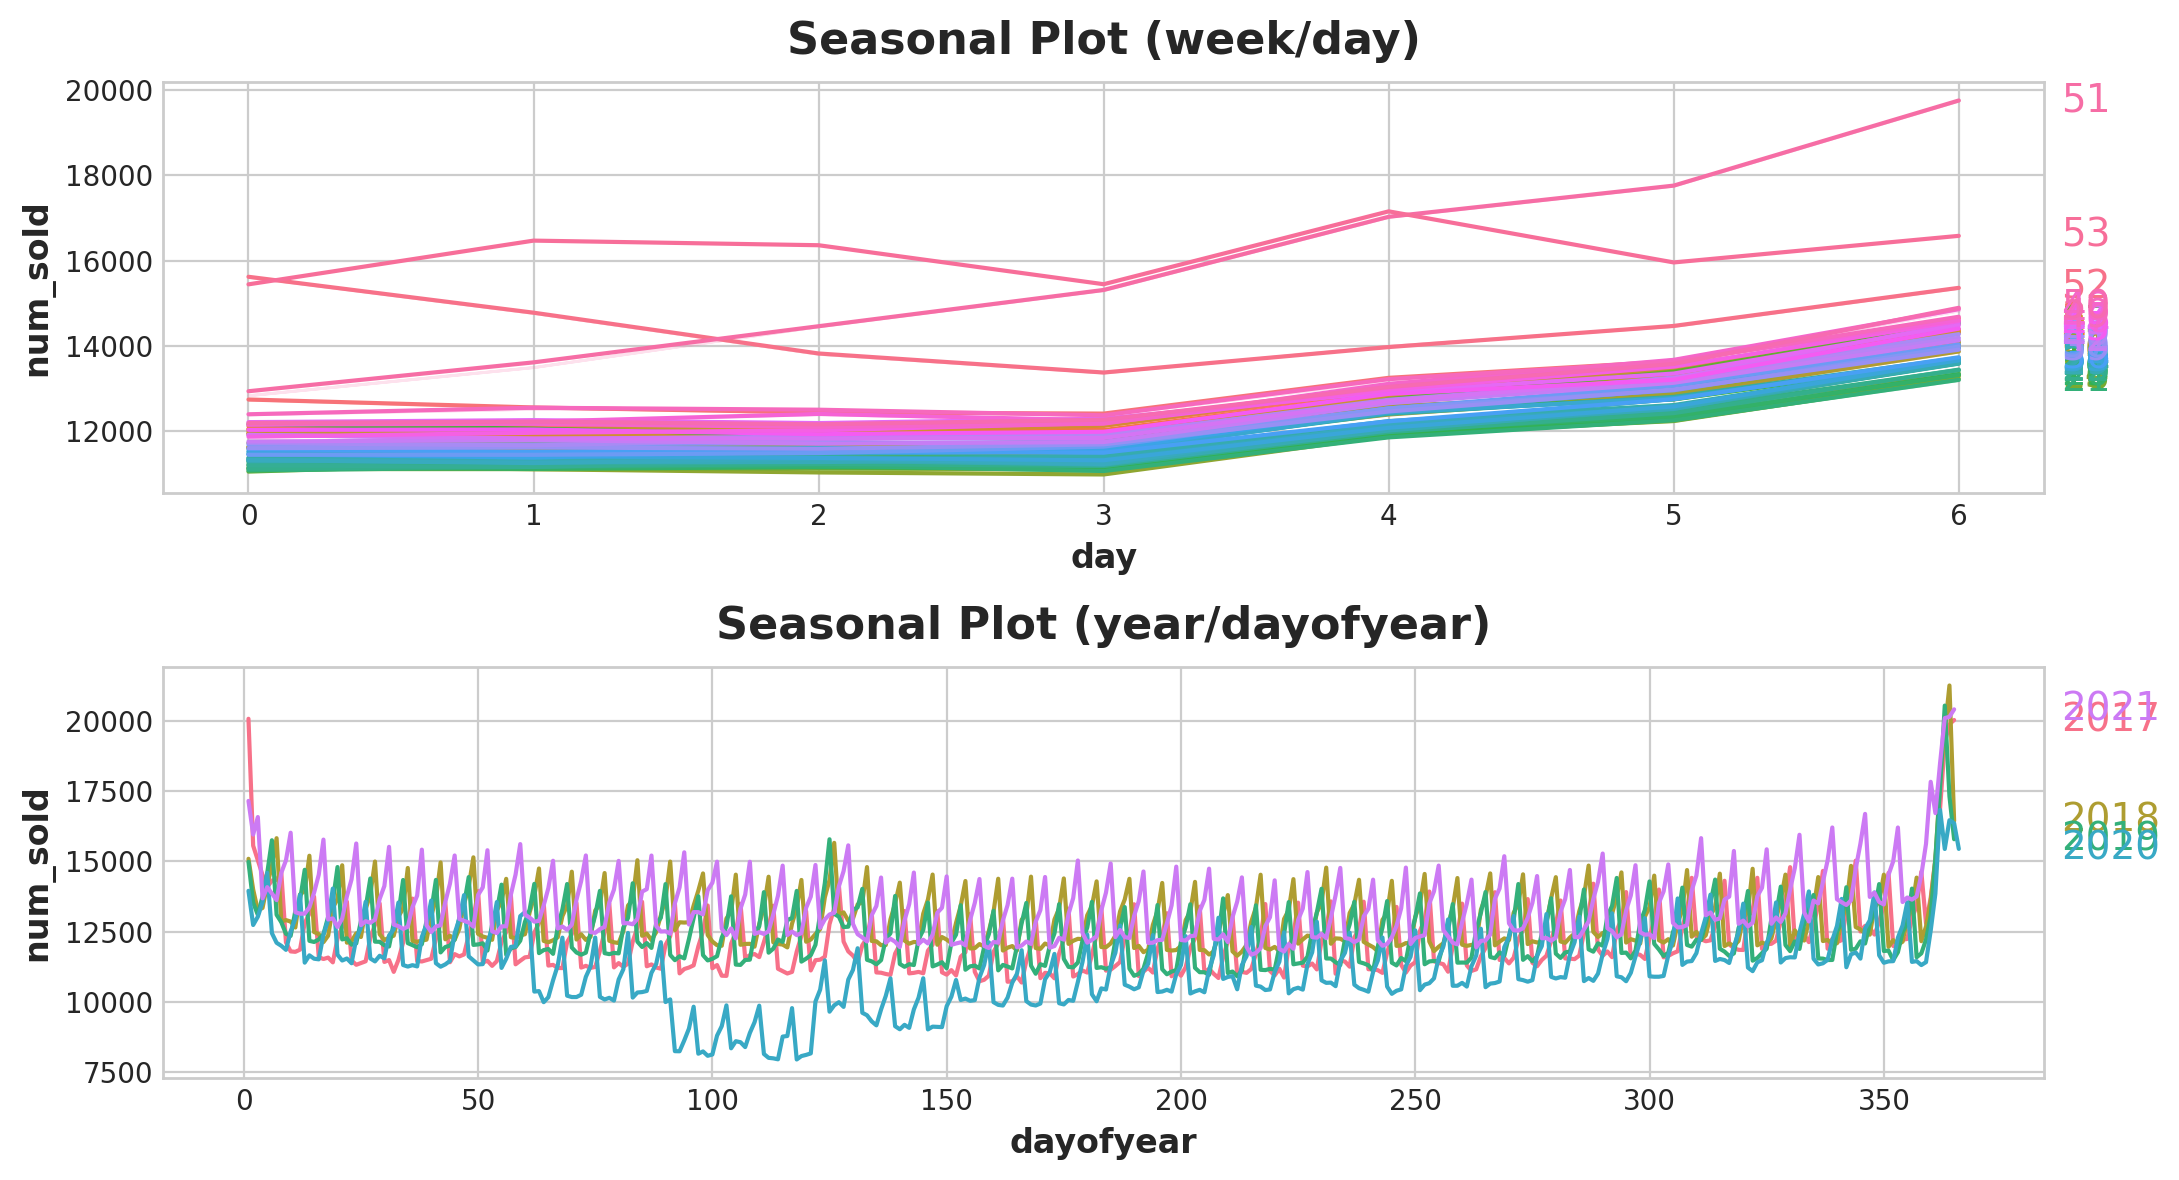

In [20]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(df_season, y="num_sold", period="week", freq="day", ax=ax0)
seasonal_plot(df_season, y="num_sold", period="year", freq="dayofyear", ax=ax1);

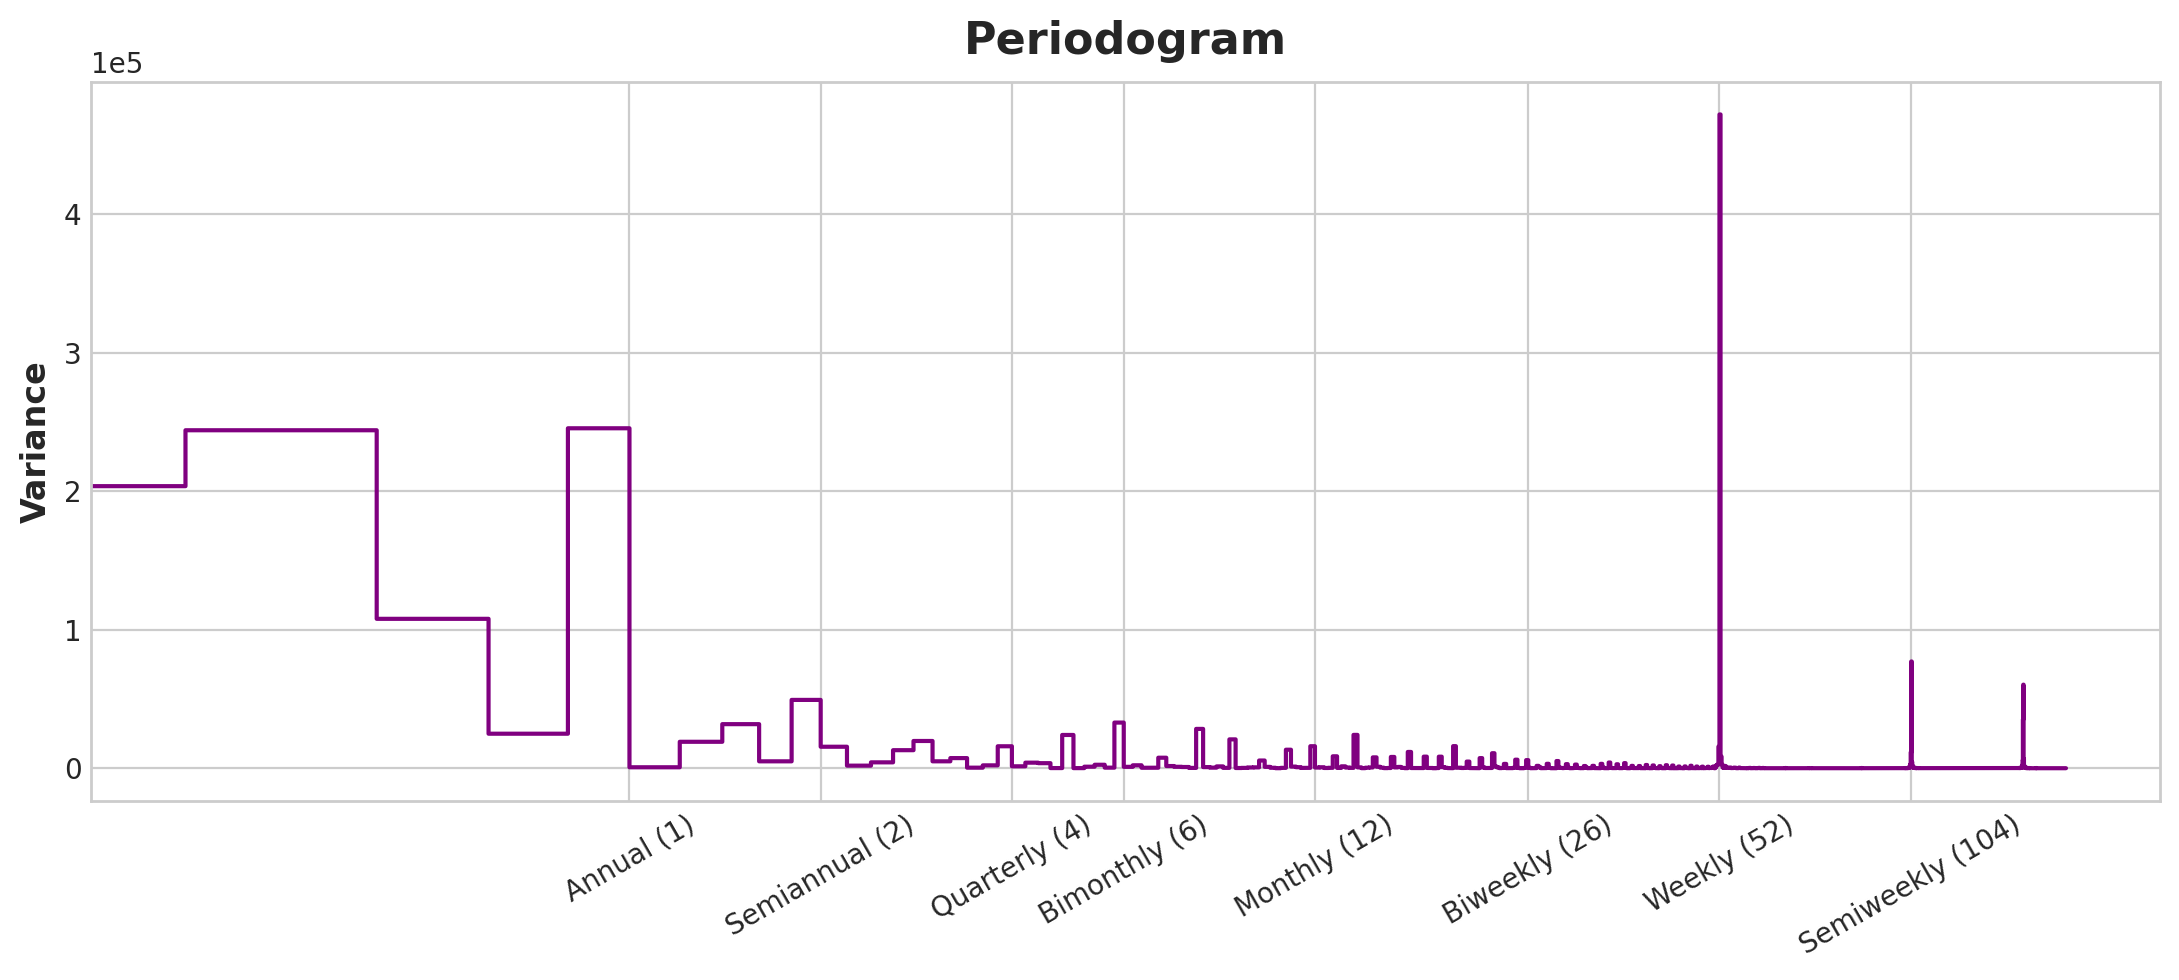

In [21]:
plot_periodogram(df_season.num_sold);
#The periodogram suggest strong weekly season which we observed visually.
#here the periodograms starts to falls off inbetween semiannual and quarterly.There fore we could use
#3 pairs of fourier features.We wont be using all the frequencies as fourier features instead only the 
#the necessay features that could capture the overall seasonality.From the periodograms we can observe
#only annual,semiannual and quarterly got enough weights hence only 3 pairs of fourier features.Weekly 
#seasonality will be added using seasonal inidcators

In [22]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq="A", order=4)  
dp = DeterministicProcess(
    index=df_season.index,
    constant=True,              
    order=1,                     
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   
)
X=dp.in_sample()

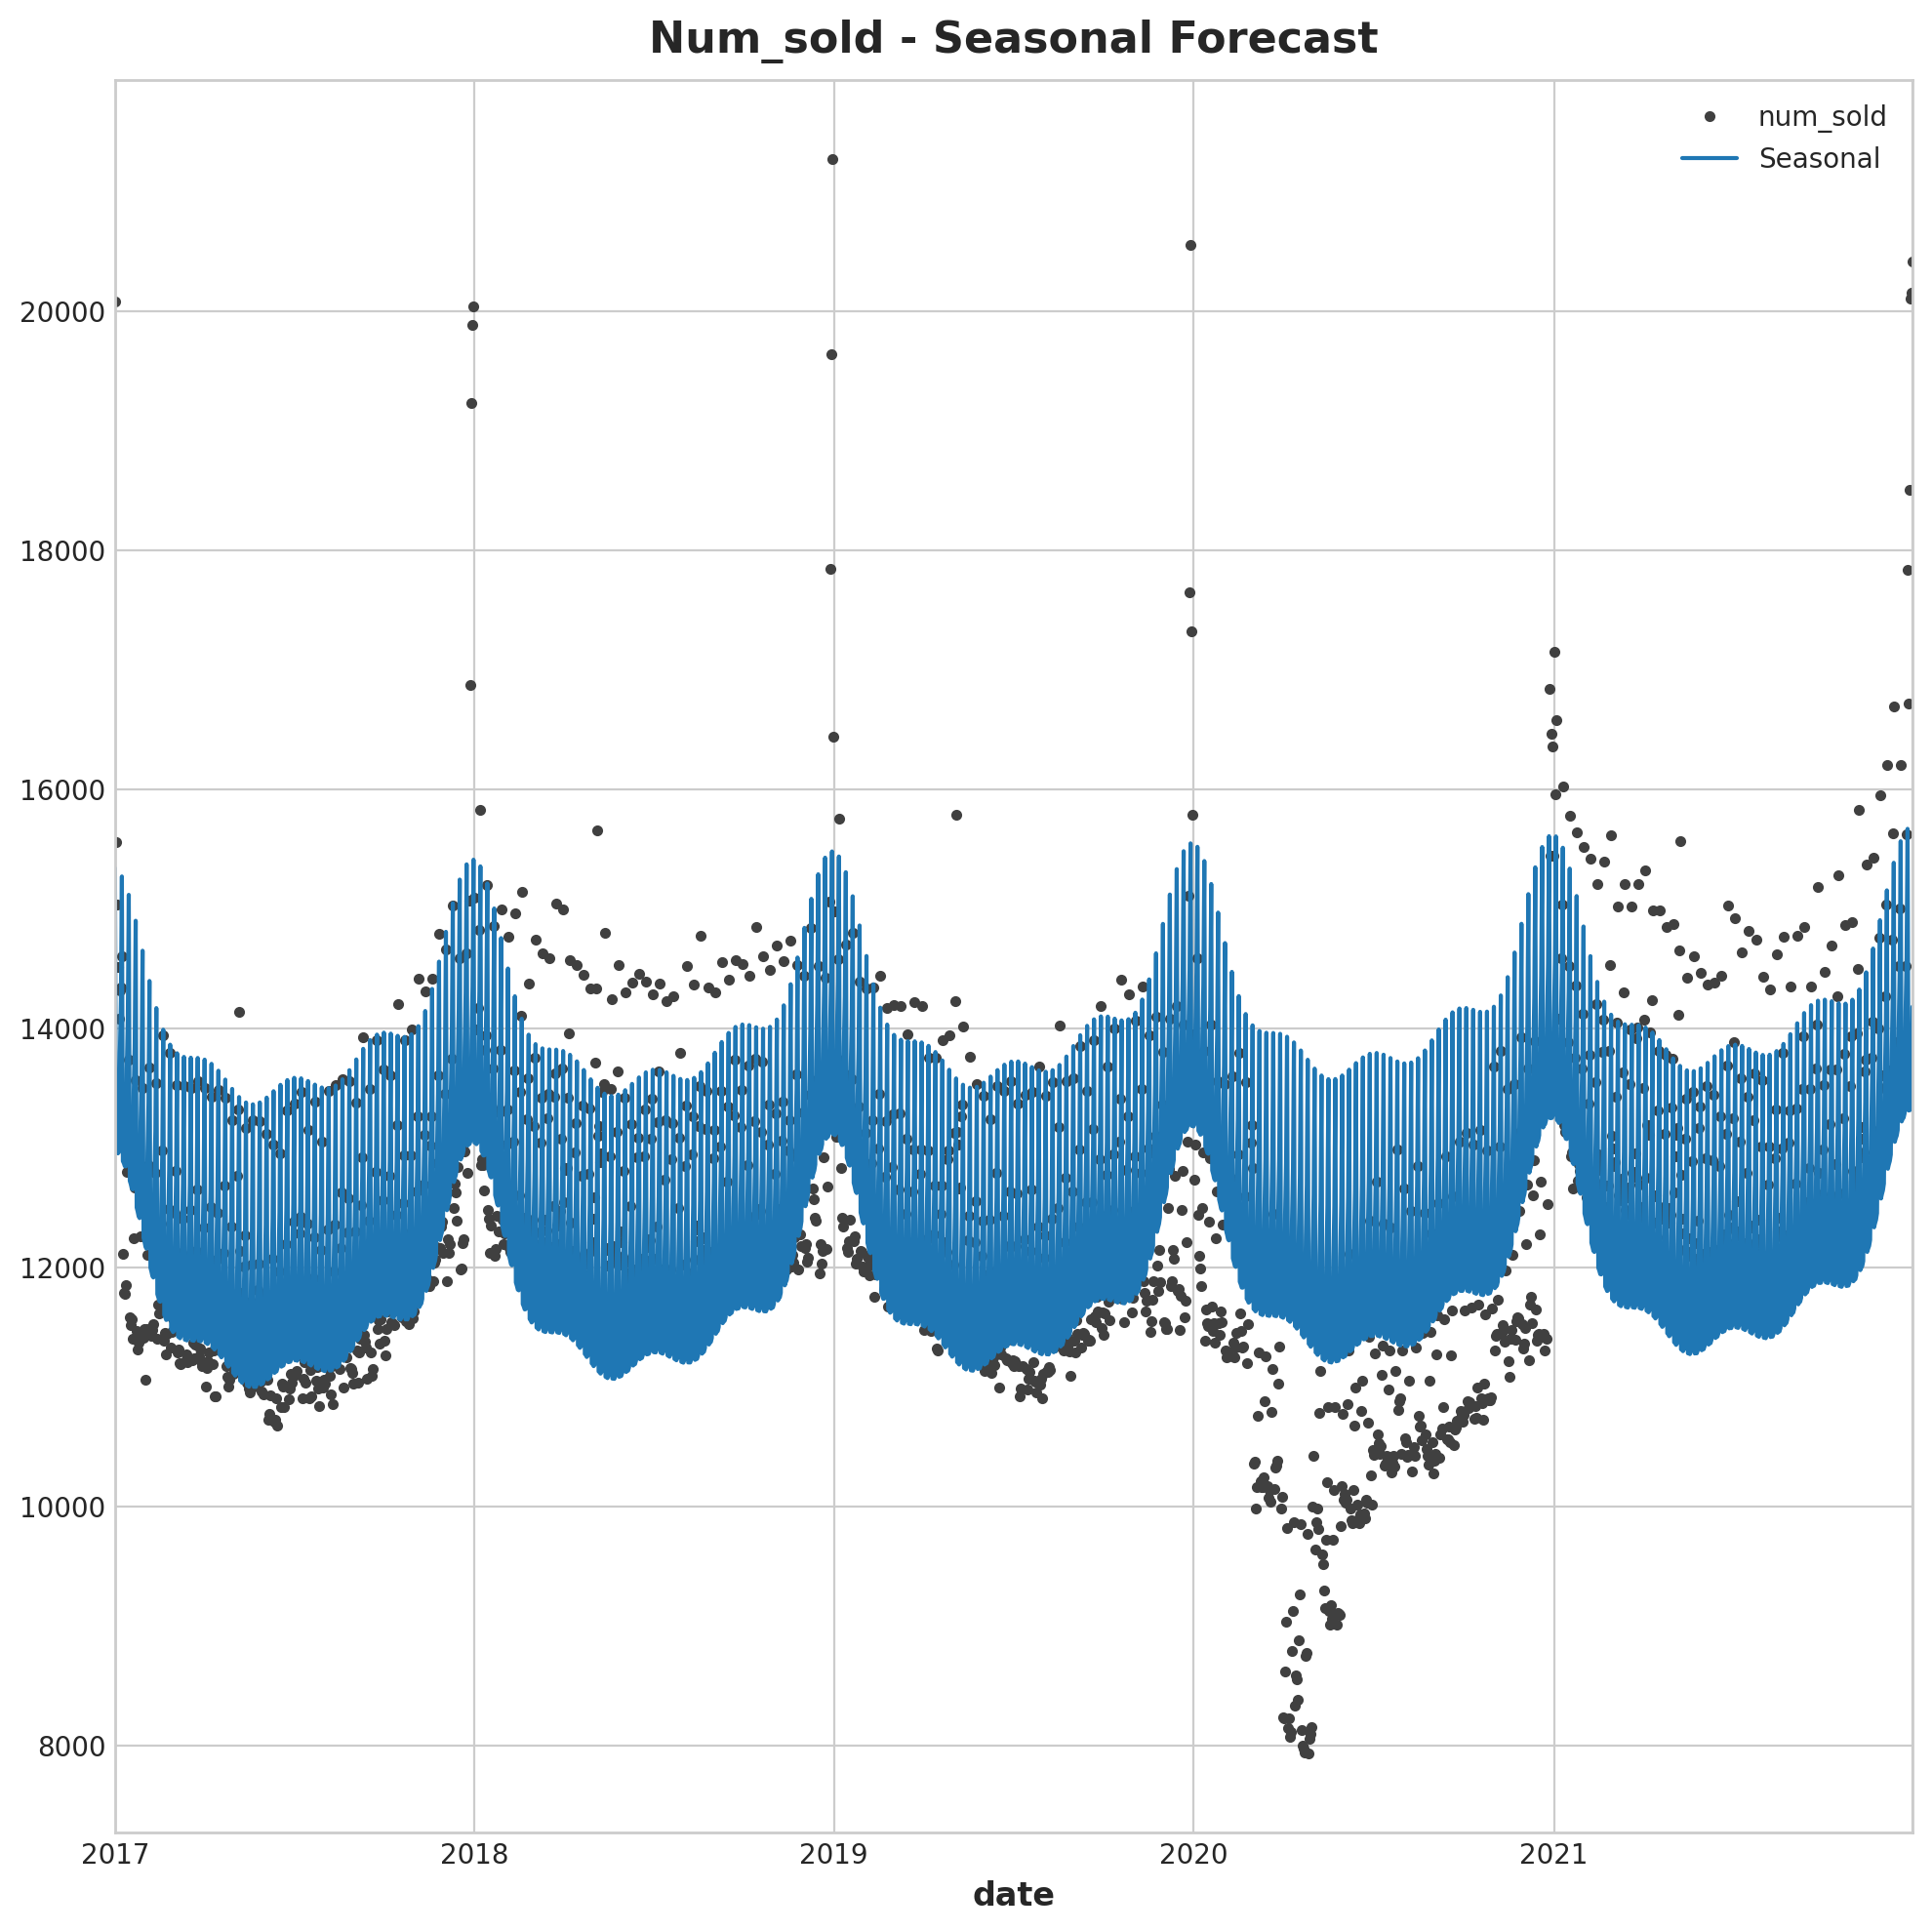

In [23]:
plt.figure(figsize=(10,10))
y = df_season["num_sold"]
model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
ax = y.plot(color='0.25', style='.', title="Num_sold - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
_ = ax.legend()

In [24]:
#If we look at how our model was able to do the forecasting we can observe that it capture almost everything
#except the dip in sale during the covid.We should do something for the model to understand that sales went
#down during the covid.

# serial dependence

In [25]:
#checking for cycles
df_cycles=df_train.groupby([df_train.date])['num_sold'].sum().to_frame()
df_cycles = pd.DataFrame({
    'num_sold': df_cycles['num_sold'],
    'num_sold_lag_1': df_cycles['num_sold'].shift(1),
    'num_sold_lag_2': df_cycles['num_sold'].shift(2),    
})

In [26]:
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

#  Feature Engineering

In [27]:
#Actually sales on holiday should be zero but this is not considered in the dataset hence we are 
#adding  and extra columns call is holiday.
# def smape(y_true, y_pred):
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
#     diff = np.abs(y_true - y_pred) / denominator
#     diff[denominator == 0] = 0.0
#     return np.nanmean(diff)

# def get_holidays(df):
#     years_list = [2017, 2018, 2019, 2020, 2021, 2022]

#     holiday_AR = holidays.CountryHoliday('AR', years = years_list)
#     holiday_CA = holidays.CountryHoliday('CA', years = years_list)
#     holiday_ES = holidays.CountryHoliday('EE', years = years_list)
#     holiday_JA = holidays.CountryHoliday('JP', years = years_list)
#     holiday_SP = holidays.CountryHoliday('ES', years = years_list)

#     holiday_dict = holiday_AR.copy()
#     holiday_dict.update(holiday_CA)
#     holiday_dict.update(holiday_ES)
#     holiday_dict.update(holiday_JA)
#     holiday_dict.update(holiday_SP)

#     df['holiday_name'] = df['date'].map(holiday_dict)
#     df['is_holiday'] = np.where(df['holiday_name'].notnull(), 1, 0)
#     df['holiday_name'] = df['holiday_name'].fillna('Not Holiday')
#     df.drop(columns = 'holiday_name', axis = 1, inplace = True)
    
#     return df

# def feature_engineer(df):
#     new_df = df.copy()
#     #Time dummies
#     new_df['month'] = df['date'].dt.month
#     new_df['month_sin'] = np.sin(new_df['month'] * (2 * np.pi / 12))
#     new_df['month_cos'] = np.cos(new_df['month'] * (2 * np.pi / 12))
#     new_df['day'] =df['date'].dt.day
#     new_df['day_sin'] = np.sin(new_df['day'] * (2 * np.pi / 365))
#     new_df['day_cos'] = np.cos(new_df['day'] * (2 * np.pi / 365))
#     new_df['day_of_week'] = df['date'].dt.dayofweek
    
#     #We have seen anomaly in sales during covid and we want the machine to capture it.So we are adding
#     # a new column
#     new_df['day_of_year'] = df['date'].dt.dayofyear
#     new_df['covid_day'] = new_df.apply(lambda x: 0 if (x['date'] >pd.Timestamp
#     ('2020-02-29')and x['date'] < pd.Timestamp('2021-01-01'))  else 1, axis = 1)
#     new_df = pd.get_dummies(new_df, columns = ['country'], drop_first = True)
#     new_df = pd.get_dummies(new_df, columns = ['store'], drop_first = True)
#     new_df = pd.get_dummies(new_df, columns = ['product'], drop_first = True)
    
#     return new_df


# df_train = get_holidays(df_train)
# df_train = feature_engineer(df_train)

# df_test = get_holidays(df_test)
# df_test = feature_engineer(df_test)

In [28]:
X = df_train.drop(columns = ['id', 'date', 'num_sold'], axis = 1)
Y = df_train['num_sold']
df_test_baseline = df_test.drop(columns = ['id', 'date'], axis = 1)
